**Tujuan utama adalah untuk memprediksi risk_rating atau tingkat risiko kredit yang bisa diberikan oleh seorang nasabah berdasarkan fitur-fitur yang diberikan. risk_rating mungkin merupakan kategori yang mengindikasikan seberapa besar risiko kredit yang dimiliki oleh peminjam**

# Data Preparation

### Data Cleansing and feature selection

**Pertama-tama kita baca filenya**

In [1]:
#Mengimport library Pandas
import pandas as pd
pd.set_option("display.max_column", 10)

#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
print(dataset_credit_scoring)

    kode_kontrak  pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0     AGR-000001                      295        YA                     48   
1     AGR-000011                      271        YA                     36   
2     AGR-000030                      159     TIDAK                     12   
3     AGR-000043                      210        YA                     12   
4     AGR-000049                      165     TIDAK                     36   
..           ...                      ...       ...                    ...   
895   AGR-010739                      112        YA                     48   
896   AGR-010744                      120        YA                     48   
897   AGR-010758                      166     TIDAK                     24   
898   AGR-010775                      196     TIDAK                     48   
899   AGR-010790                      204     TIDAK                     24   

     jumlah_tanggungan rata_rata_overdue  risk_rating  
0      

**Habistu kita buat dataset dengan data yang diperlukan**

In [2]:
#Membuat dataset
dataset= dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
print(dataset.head(5))

   pendapatan_setahun_juta kpr_aktif  durasi_pinjaman_bulan  \
0                      295        YA                     48   
1                      271        YA                     36   
2                      159     TIDAK                     12   
3                      210        YA                     12   
4                      165     TIDAK                     36   

   jumlah_tanggungan rata_rata_overdue  risk_rating  
0                  5      61 - 90 days            4  
1                  5      61 - 90 days            4  
2                  0       0 - 30 days            1  
3                  3      46 - 60 days            3  
4                  0      31 - 45 days            2  


**Kita ubah variabel kpr_aktif jadi 0 dan 1**

In [3]:
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])

#Memeriksa nilai unik pada kolom rata_rata_overdue
print("Nilai unik pada kolom rata_rata_overdue")
print(dataset['rata_rata_overdue'].value_counts(), '\n')

Nilai unik pada kolom rata_rata_overdue
rata_rata_overdue
46 - 60 days    291
0 - 30 days     227
31 - 45 days    159
61 - 90 days    120
> 90 days       103
Name: count, dtype: int64 



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7208\907575163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])


**Kemudian _rata_rata_overdue_ menjadi numerik**

In [4]:
#Mengubah data rata_rata_overdue menjadi numerik
#Jadi dict-nya buat ngubah nilai2nya
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}

dataset = dataset.replace(mapping_dict)
print("\nNilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik")
print(dataset['rata_rata_overdue'].value_counts(), '\n')


Nilai unik pada kolom rata_rata_overdue setelah dikonversi menjadi numerik
rata_rata_overdue
60    291
30    227
45    159
90    120
91    103
Name: count, dtype: int64 



In [5]:
#Liat keseluruhan datanya
print(dataset.head())

   pendapatan_setahun_juta  kpr_aktif  durasi_pinjaman_bulan  \
0                      295          1                     48   
1                      271          1                     36   
2                      159          0                     12   
3                      210          1                     12   
4                      165          0                     36   

   jumlah_tanggungan  rata_rata_overdue  risk_rating  
0                  5                 90            4  
1                  5                 90            4  
2                  0                 30            1  
3                  3                 60            3  
4                  0                 45            2  


### Uji Korelasi

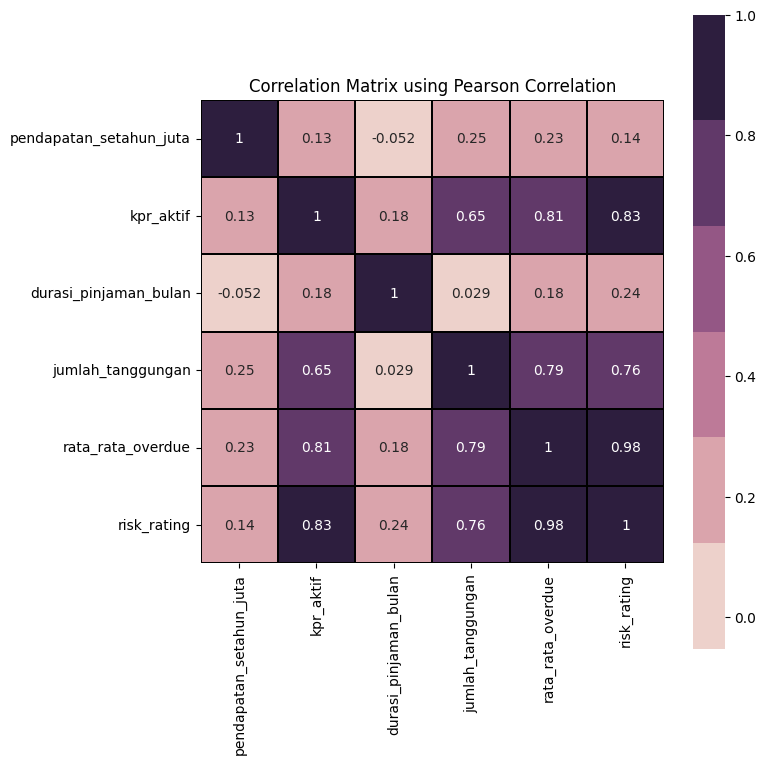

In [6]:
dataset = dataset.replace(mapping_dict)

#Melihat korelasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Membangun heatmap
#f = gambar
#ax = axis
f, ax = plt.subplots(figsize = (8,8)) 
#Membuat subplot (area di dalam plot) dengan ukuran 8x8 inci. 
# Variabel f digunakan untuk gambar (figure), dan variabel ax digunakan untuk sumbu (axis).


plt.title('Correlation Matrix using Pearson Correlation') #Buat judulnya

#Menampilkan nilai korelasi tiap variabel kedalam bentuk heatmap
sns.heatmap(dataset.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, linecolor='black',
             annot=True, cmap=sns.cubehelix_palette())
#dataset.astype(float).corr() , hitung korelasi pearson antar variabel
#linewidths=0.25 ,              ketebalan garis antar heatmap
#vmax=1.0 ,                     Nilai maksimum legenda-nya
#square=True ,                  Menjadikan sel-sel heatmap berbentuk kotak agar lebih mudah dibaca.
#linecolor='black',             Menentukan warna garis antar sel dalam heatmap.
#annot=True,                    Menampilkan nilai korelasi di dalam setiap sel heatmap.
#cmap=sns.cubehelix_palette(),  Menentukan skema warna yang digunakan untuk heatmap. #bisa diganti-ganti

plt.tight_layout() # Menyusun ulang subplot agar sesuai dengan layout dan memastikan bahwa elemen-elemen plot tidak tumpang tindih.
plt.show()

**Menghapus kolom dengan korelasi rendah**

In [7]:
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)
print(dataset.head())


   kpr_aktif  jumlah_tanggungan  rata_rata_overdue  risk_rating
0          1                  5                 90            4
1          1                  5                 90            4
2          0                  0                 30            1
3          1                  3                 60            3
4          0                  0                 45            2


# Modelling

## 1. Naive Bayes

Naive bayes adalah teknik klasifikasi statistik berdasarkan Teorema Bayes, merupakan salah satu algoritma supervised learning yang paling sederhana. Pengklasifikasian Naive Bayes memiliki akurasi dan kecepatan tinggi pada kumpulan data besar.

### Model Making Naive Bayes

In [8]:
#Import library Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Membagi data training dan data testing
from sklearn.model_selection import train_test_split

In [9]:
#Input variabel x dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai label (y) (dependen)
x = dataset.drop('risk_rating',axis=1)

#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')

#splitting data train 80% test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [10]:
# Calculate the number of elements in each set
num_samples_x_train = x_train.shape[0]
num_samples_x_test = x_test.shape[0]
num_samples_y_train = y_train.shape[0]
num_samples_y_test = y_test.shape[0]

print(f"Number of samples in x_train: {num_samples_x_train}")
print(f"Number of samples in x_test: {num_samples_x_test}")
print(f"Number of samples in y_train: {num_samples_y_train}")
print(f"Number of samples in y_test: {num_samples_y_test}")


Number of samples in x_train: 630
Number of samples in x_test: 270
Number of samples in y_train: 630
Number of samples in y_test: 270


In [11]:
print("Ini tabel x:")
print(x)

print("Ini tabel y:")
print(y)

Ini tabel x:
     kpr_aktif  jumlah_tanggungan  rata_rata_overdue
0            1                  5                 90
1            1                  5                 90
2            0                  0                 30
3            1                  3                 60
4            0                  0                 45
..         ...                ...                ...
895          1                  5                 91
896          1                  2                 60
897          0                  2                 30
898          0                  0                 45
899          0                  2                 30

[900 rows x 3 columns]
Ini tabel y:
0      4
1      4
2      1
3      3
4      2
      ..
895    5
896    3
897    1
898    2
899    1
Name: risk_rating, Length: 900, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [12]:
print("Ini dataset x train:")
print(x_train)

print("Ini dataset y train:")
print(y_train)


Ini dataset x train:
     kpr_aktif  jumlah_tanggungan  rata_rata_overdue
76           0                  5                 30
48           0                  2                 30
664          1                  4                 60
263          0                  0                 45
727          0                  0                 45
..         ...                ...                ...
835          1                  6                 91
192          1                  5                 91
629          1                  3                 60
559          0                  1                 30
684          1                  0                 60

[630 rows x 3 columns]
Ini dataset y train:
76     1
48     1
664    3
263    2
727    2
      ..
835    5
192    5
629    3
559    1
684    3
Name: risk_rating, Length: 630, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [13]:
print("Ini dataset x test:")
print(x_train)

print("Ini dataset y test:")
print(y_train)

Ini dataset x test:
     kpr_aktif  jumlah_tanggungan  rata_rata_overdue
76           0                  5                 30
48           0                  2                 30
664          1                  4                 60
263          0                  0                 45
727          0                  0                 45
..         ...                ...                ...
835          1                  6                 91
192          1                  5                 91
629          1                  3                 60
559          0                  1                 30
684          1                  0                 60

[630 rows x 3 columns]
Ini dataset y test:
76     1
48     1
664    3
263    2
727    2
      ..
835    5
192    5
629    3
559    1
684    3
Name: risk_rating, Length: 630, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [14]:

#Menjalankan data training dengan naive bayes
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

#Menjalankan data testing
y_predict = model_nb.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3 3 4 5 4 3
 1 1 3 2 2 3 3 4 2 5 3 5 1 3 5 2 3 2 3 3 2 3 3 3 1 1 1 3 1 1 3 2 3 2 3 3 1
 1 1 1 5 1 3 2 1 4 1 5 4 4 3 3 3 3 3 2 3 1 4 4 4 3 5 3 3 1 1 4 1 5 1 5 2 1
 2 2 3 4 4 1 2 4 2 5 3]


### Goodness of Fit(Naive Bayes)

Ini tuh buat ngetes sebearapa cocok suatu model <br>
Kurang lebih sama kayak di R lang, harus bikin modelnya dulu baru di tes GoF

In [15]:
# Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score (y_test, y_predict))

1.0


“Wah berarti akurasinya 100% ya,” kata Kroma. <br>
<br>
“Betul. Tapi untuk lebih yakin dengan hasil kinerja model, aku akan menggunakan teknik evaluasi lain yaitu confusion matrix. Caranya seperti berikut.”

**What is a Confusion Matrix?**

A confusion matrix, as the name suggests, is a matrix of numbers that tell us where a model gets confused. It is a class-wise distribution of the predictive performance of a classification model—that is, the confusion matrix is an organized way of mapping the predictions to the original classes to which the data belong.

This also implies that confusion matrices can only be used when the output distribution is known, i.e., in supervised learning frameworks.

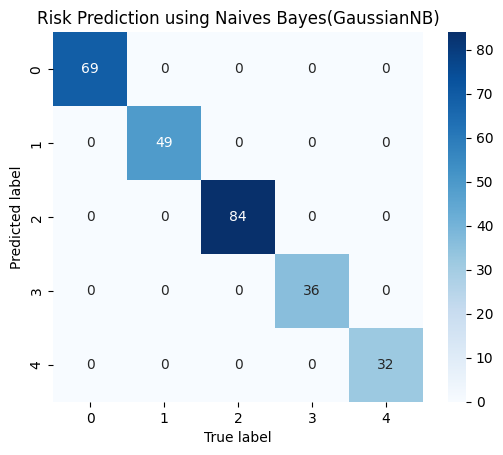

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')

# Set labels
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Risk Prediction using Naives Bayes(GaussianNB)")
plt.show()

**Interpretation** <br>
 Let that matrix be called “M,” and each element in the matrix be denoted by “M_ij,” where “i” is the row number (predicted class), and “j” is the column number (expected class), e.g., M_00=47, M_44=22.
<br>
This confusion matrix gives a lot of information about the model’s performance: 

    - As usual, the diagonal elements are the correctly predicted samples. A total of 180 samples were correctly predicted out of the total 180 samples. Thus, the overall accuracy is 100%.
    
    - M_ij=0 implies that the model does not confuse samples originally belonging to class-j with class-i, i.e., the classification boundary between classes i and j was learned well by the classifier.

In [17]:
#Lebih lengkap
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



## 2. K-Nearest Neighbors
Literally nge-prediksi data berdasarkan tetangga terdekat (Banyak tetangga biasanya di wakili oleh huruf 'K')<br>
Banyak tetangga(K) harus ganjil supaya gaada yang seimbang

### Model Making KNN

In [18]:
# Import library KNN
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#Membuat model knn
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train,y_train)

#Menjalankan data testing
y_predict = model_knn.predict(x_test)
print(y_predict)

[2 1 3 2 4 4 1 3 3 5 1 2 5 2 3 3 1 3 3 4 2 3 3 1 5 3 3 3 3 3 2 3 5 3 1 4 4
 4 4 2 4 1 1 2 5 3 5 2 1 1 2 5 1 1 2 5 1 3 3 3 4 2 3 5 5 3 3 3 4 1 5 4 2 1
 1 4 3 3 3 5 1 2 3 2 4 3 1 3 2 1 2 3 2 2 3 1 2 5 5 1 1 1 3 1 5 4 3 5 2 2 3
 3 1 1 2 1 4 4 2 2 5 4 3 1 4 1 3 1 1 5 1 1 1 3 3 2 5 3 1 4 3 5 3 5 2 3 1 2
 2 3 3 3 3 4 5 3 3 4 3 1 2 1 1 1 2 1 3 1 4 2 1 1 4 2 2 1 1 1 3 3 3 4 5 4 3
 1 1 3 2 2 3 3 4 2 5 3 5 1 3 5 2 3 2 3 3 2 3 3 3 1 1 1 3 1 1 3 2 3 2 3 3 1
 1 1 1 5 1 3 2 1 4 1 5 4 4 3 3 3 3 3 2 3 1 4 4 4 3 5 3 3 1 1 4 1 5 1 5 2 1
 2 2 3 4 4 1 2 4 2 5 3]


### Goodness of Fit (KNN)

In [20]:
# Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score (y_test, y_predict))

1.0


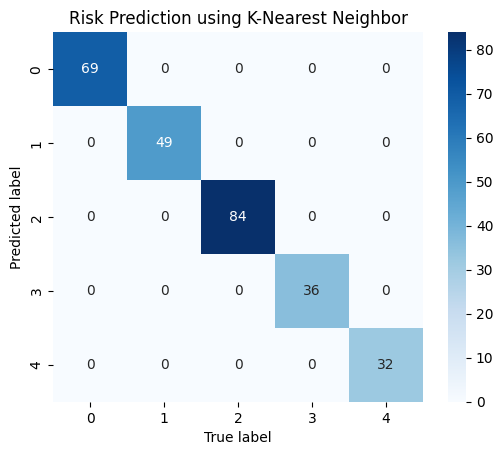

In [21]:
# Menampilkan confusion matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')

# Set labels
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Risk Prediction using K-Nearest Neighbor")
plt.show()

In [22]:
#lebih lengkap
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        32

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



### Handling Overfitting

Karna gak yakin pasti 100% jadi mau dicek apakah modelnya overfit

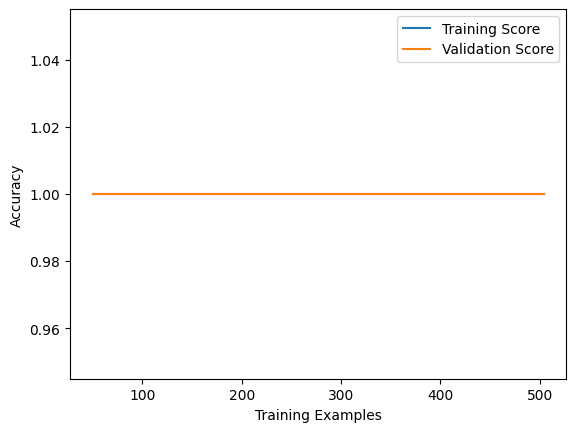

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(model_nb, x_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Wtf? ya juga sih :v <br>
Try another

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_nb, x, y, cv=5)
# scores = cross_val_score(model_knn, x, y, cv=5)
print(f'Cross-Validation Scores: {scores}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]


## 3. Logistic Regression

logistic regression lebih umum digunakan untuk memodelkan probabilitas dari kelas tertentu, seperti ya/tidak, lulus/gagal, sakit/sehat, di mana berarti target merupakan kelas biner.





**Logistic Regression** is a classification algorithm used when the response variable is categorical. For instance, it can be used for cancer detection problems (like our tumor example) where the task is to predict a category - malignant or benign. To build out to the logistic regression algorithm, we'll use **The Sigmoid function**.

The Sigmoid function is a fundamental part of logistic regression. It maps any real-valued number into the range [0, 1], which can be interpreted as a probability for binary classification.

Let's start with what we know, previously we use linear equation to help us find a model that fits our data. Which is a straight line, then we fine tune the line using parameter `w` and `b`.

Accuracy score:  0.8722222222222222


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7208\2053221452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])


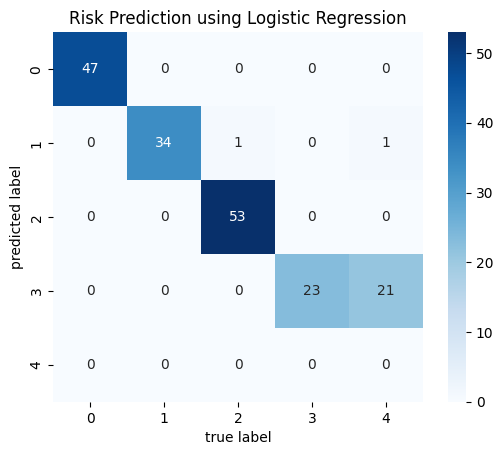

In [25]:
#Mengimport library Pandas
import pandas as pd
pd.set_option("display.max_column", 10)
#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
#Membuat dataset
dataset = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}
dataset = dataset.replace(mapping_dict)
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)

#Input variabel X dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
X = dataset.drop('risk_rating',axis=1)
#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')
#Membagi data training dan data testing
from sklearn.model_selection import train_test_split
#splitting data train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Import library LogisticRegression
from sklearn.linear_model import LogisticRegression
#Membuat Objek model_lr
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)

#Menjalankan data testing
y_predict= model_lr.predict(X_test)

#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

import seaborn as sns
import matplotlib.pyplot as plt

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.title("Risk Prediction using Logistic Regression")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## 4. Support Vector Machines (SVM)

Accuracy score:  1.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7208\2038068321.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])


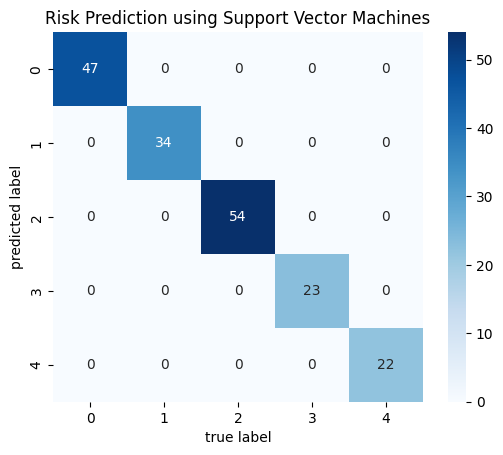

In [26]:
#Mengimport library Pandas
import pandas as pd
pd.set_option("display.max_column", 10)
#Membaca dataset
dataset_credit_scoring = pd.read_excel('https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx')
#Membuat dataset
dataset = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}
dataset = dataset.replace(mapping_dict)
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)

#Input variabel X dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
X = dataset.drop('risk_rating',axis=1)
#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')
#Membagi data training dan data testing
from sklearn.model_selection import train_test_split
#splitting data train 80% test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Import library SVM
from sklearn import svm
#Membuat Objek model_svm
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

#Menjalankan data testing
y_predict = model_svm.predict(X_test)

#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_predict))

import seaborn as sns
import matplotlib.pyplot as plt

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot = True, cmap = 'Blues')
plt.title("Risk Prediction using Support Vector Machines")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()